# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Data loaded successfully.')

Data loaded successfully.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

10


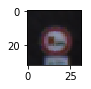

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

#Getting random index fron traing dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

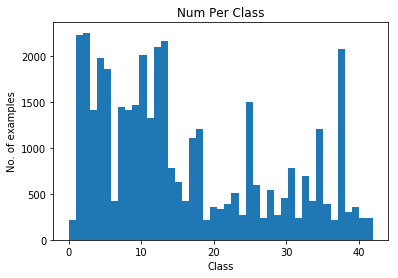

In [4]:
# Ploting image type distribution
def plot_histogram():
    histogram, bins = np.histogram(y_train, bins=n_classes)
    width =  (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, histogram, align='center', width=width)
    plt.ylabel('No. of examples')
    plt.xlabel('Class')
    plt.title('Num Per Class')
    plt.show()
    
plot_histogram()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Question 1

Describe how you preprocessed the data. Why did you choose that technique?

**Answer:**

**Step1:** Convert to grayscale. Reasons are: 
a. Color increases complexity of model, like it acts signal to noise and increase code complexity 
b. Less training time 

**Step2:** Normalize the train and test datasets between 0.1-0.9 as described in normalization intro lessons keep training values close to 0 gives better numerical stability and keeps the optimizer from having to do a lot of searching to find the solution


Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [6]:
### Grayscale the images
import cv2
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale_features(dataset_, num_samples_, image_shape_):
    gray = np.empty([num_samples_, image_shape_[0], image_shape_[1]], dtype=dataset_.dtype)
    for index in range(0, num_samples_):
        gray[index,:,:] = grayscale(dataset_[index,:,:,:])    
    return gray

### Image data normalization ####
def normalize_features(imgages):
    #change type to np.float32 to accomodate negative numbers
    normalized = (images.astype(np.float32) - 128)/128    
    return normalized

def normalize_features_pos(img_):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    out_min = 0.1
    out_max = 0.9
    greyscale_min = 0
    greyscale_max = 255
    
    slope = (out_max - out_min)/( greyscale_max - greyscale_min )
    b = out_min
    return slope*(img_.astype(np.float32) - greyscale_min) + out_min



In [7]:
### Preprocess the data
### Step1: Convert to grayscale
### Reasons:
### a. Color increases complexity of model, like it acts signal to noise and increase code complexity
### b. Less training time

X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True) #grayscale_features(X_train, n_train, image_shape)
X_train = X_train_gry;

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True) #grayscale_features(X_test, n_test, image_shape)
X_test = X_test_gry

In [8]:
### Preprocess the data
### Step2: Normalize the train and test datasets

X_train_normalized = normalize_features_pos(X_train_gry) 
X_test_normalized = normalize_features_pos(X_test_gry)

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

-0.346366778547
-0.350402653428


In [9]:
from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
from sklearn.model_selection import train_test_split

## Number of adjustable params = 42. validation test size = 1/sqrt(42)
## Source: http://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.152, random_state=0)
print("Old training set size:",len(X_train_normalized))
print("New training set size:",len(X_train))
print("X_validation size:",len(X_validation))

Old training set size: 39209
New training set size: 33249
X_validation size: 5960


### Question 2
Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

**Answer:**

I have created validation set out of the training set. I used 15.2% of the testing set to create the validation set.

**Logic:**
I have 43 adjustable parameters, the square root of 43 is ~6.55, the fraction should be 1/6.55 or 0.152. Roughly 15% should is reserved for validation and 85% for training.


### Question 3
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom.

**Architecture**

Following the link given I used Sermanet/LeCun architecture with few modifications. Also the filters are similar to LeNet architecture which was part of lab. I added one more extra Fully connected layer instead of directly converting 800 to 43(labels)
**Layer 1:** Convolutional. 5x5 convolution. 32x32x1 -> 28x28x6

**Activation.** ReLu

**Pooling.** 2x2 Pooling which converts 28x28x6 -> 14x14x6

**Layer 2:** Convolutional. 5x5 convolution. 14x14x6 -> 10x10x16

**Activation.** ReLu 

**Pooling.** 2x2 Pooling which converts 10x10x16 -> 5x5x16

**Layer 3:** Convolutional. 5x5 convolution. 5x5x16 -> 1x1x400

**Activation.** ReLu 

**Concatenation.** Flatten Concatenate Layer2 and Layer3 output. output 800 

**Dropout.** Dropout with dropout rate of 0.5 

**FC Layer 1:** Fully connected. 800 (input) -> 240 (output) 

**Activation.** ReLu 

**Dropout.** Dropout with dropout rate of 0.5 

**FC Layer 2:** Fully connected. 240 (input) -> 43 (output) 

return logits (of FC Layer output) 


### Pre-process the Data Set (normalization, grayscale, etc.)

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 90
BATCH_SIZE = 128

mu = 0
sigma = 0.1
       
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape=(240, 43), mean = mu, stddev = sigma))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([6])),
    'bc2': tf.Variable(tf.random_normal([16])),
    'bc3': tf.Variable(tf.random_normal([400])),
    'bd1': tf.Variable(tf.random_normal([240])),
    'out': tf.Variable(tf.random_normal([43]))
}

### Train, Validate and Test the Model

In [11]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x): 
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Activation
    conv2 = tf.nn.relu(conv2)
    # Pooling Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    
    #Flatten. Input = 5x5x16. Output = 400.
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Activation
    conv3 = tf.nn.relu(conv3)
    
    # Concatenation: Concatenate Layer2 output 5x5x6(flatten it) and Layer3 output. output 800.
    conv2 = flatten(conv2)
    conv3 = flatten(conv3)
    conv_concat = tf.concat_v2([conv2, conv3], 1)
    
    # Dropout
    conv_concat = tf.nn.dropout(conv_concat, keep_prob)

    # FC Layer 1: Fully Connected. Input = 800. Output = 240.
    fc1 = tf.add(tf.matmul(conv_concat, weights['wd1']), biases['bd1'])
    #Activation
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # FC Layer 2: Fully Connected. Input = 240. Output = 43.
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return logits

def get_conv2(x):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Activation
    conv2 = tf.nn.relu(conv2)
    # Pooling Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    conv2 = flatten(conv2)
    return conv2

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

In [15]:
###Training Pipeline###
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
### Model Evaluation ###

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
### Training the Model ###

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Start Training...\n")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        
    saver.save(sess, 'lenet')
    print("Model saved")

Start Training...

EPOCH 1 ...
Validation Accuracy = 0.343

EPOCH 2 ...
Validation Accuracy = 0.777

EPOCH 3 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.918

EPOCH 5 ...
Validation Accuracy = 0.934

EPOCH 6 ...
Validation Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.955

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.967

EPOCH 10 ...
Validation Accuracy = 0.975

EPOCH 11 ...
Validation Accuracy = 0.976

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.977

EPOCH 14 ...
Validation Accuracy = 0.984

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.983

EPOCH 17 ...
Validation Accuracy = 0.984

EPOCH 18 ...
Validation Accuracy = 0.981

EPOCH 19 ...
Validation Accuracy = 0.987

EPOCH 20 ...
Validation Accuracy = 0.985

EPOCH 21 ...
Validation Accuracy = 0.987

EPOCH 22 ...
Validation Accuracy = 0.989

EPOCH 23 ...
Validation Accuracy = 0.988

EPOCH 24 ...
Validation 

In [19]:
# Now evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.946


## Question 4
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

**Answer:**
Parameters for training model are almost similar to LeNet lab. Following are details:
. mu = 0 
. sigma = 0.1 
. batch size = 128 (power of 2) 
. epochs = 90 
. learning rate = 0.001 
. dropout rate = 0.5 
. train size = 84.8% 
. validation size = 15.2% (1/SQRT(43)) 

## Question 5
What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.

**Answer:**
I have started with Sermanet/LeCun model and had initial validation accuracy of ~96%. Lot of inputs are taken directly from class room exercies and LeNet lab. On top of Sermanet/LeCun model I made few changes which worked well. Following are learning and changes: 
- Validation size of 80:20(generally recommended) or 90:10 did not work well. Using (1/SQRT(43)) yeilded better results. 80:20 is just benchmark and will hold true most of the times with bigger datasets. Some trail and error to validate the theory. 
- No of epochs. I tried with epochs ranging from 20-60 with different learning rates and validation test sizes. Higher epochs did not improve accuracy. Settled with 90 
- Adapting Sermanet/LeCun model I added two Fully connected layers in the end. One which converts from 800 to 240 and from 240 to 43 (final number of labels). Second FC layer only added minor improvement of ~0.2% but why not take it. 
- Dropouts. Did few trail and errors by adding and removing Dropouts. Also, some trail and error on dropout rates ranging from 0.4-0.7 but settled for 0.5. Adding dropouts before two FC layers improved accuracy by ~0.5% which was good. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

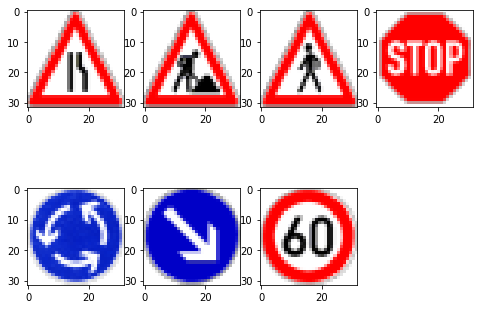

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
import glob
import matplotlib.image as mpimg

candidate_images = []
candidate_labels = [24, 25, 27, 14, 40, 38, 3]
figure, axis = plt.subplots(2,4, figsize=(8, 6))
axis = axis.ravel()

for index, img in enumerate(glob.glob("./random-traffic-signs-data/*.png")):
    image = cv2.imread(img)     
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    axis[index].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    cv2.GaussianBlur(image, (5, 5), 0) #this did not help much
    candidate_images.append(image)
    
candidate_images = np.asarray(candidate_images)
candidate_image_normal = candidate_images

images_gray = np.sum(candidate_images/3, axis=3, keepdims=True)
candidate_images = (images_gray - 127)/128


## Question 6
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

**Answer**


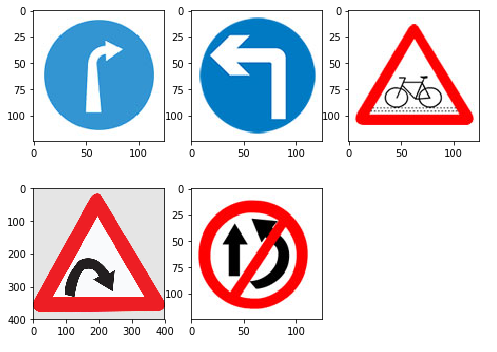

In [21]:
candidate_images_difficult = []

figure, axis = plt.subplots(2,3, figsize=(8, 6))
axis = axis.ravel()

for index,img in enumerate(glob.glob("./random-traffic-signs-data_diff/*.*")):
    image_difficult = cv2.imread(img)
    plt.axis("off")
    axis[index].imshow(cv2.cvtColor(image_difficult, cv2.COLOR_BGR2RGB))

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
from numpy import array

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    candidate_image_accuracy = evaluate(candidate_images, candidate_labels)
    print("Test Set Accuracy on cadidate images = {:.3f}".format(candidate_image_accuracy))

Test Set Accuracy on cadidate images = 0.714


## Question 7
Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.
**NOTE:** You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.
**Answer:**
Some of the images I captured were images with plain background, clear traffic sign covering entire image with good angle. Accuracy on these images was close to 100%. 
To test model I replaced images with less clarity and with lot of background noise (tree, mountains etc) and traffic sign width in image. Noisy images are plotted above. Doing this reduced the accuracy to 71.4%.
Solution to improve accuracy: To improve the accuracy of the model data augmentation should be implemented on training data. Several classes in the data have fewer examples(graph plotted on the top) which resulted in bias.


### Predict the Sign Type for Each Image

TopKV2(values=array([[  9.99992132e-01,   7.85762131e-06,   4.37424639e-08],
       [  1.00000000e+00,   1.86693940e-18,   7.57078126e-29],
       [  9.80924785e-01,   1.90752242e-02,   1.47615481e-13],
       [  9.95468616e-01,   3.20211262e-03,   1.12505595e-03],
       [  9.58218753e-01,   4.17713262e-02,   7.80499704e-06],
       [  1.00000000e+00,   4.20654201e-24,   1.59961566e-25],
       [  1.00000000e+00,   9.24224342e-09,   9.11067277e-10]], dtype=float32), indices=array([[24, 21, 19],
       [25, 20, 27],
       [11, 27, 18],
       [14,  2,  5],
       [40, 11, 12],
       [38, 25, 18],
       [ 2,  3,  1]], dtype=int32))


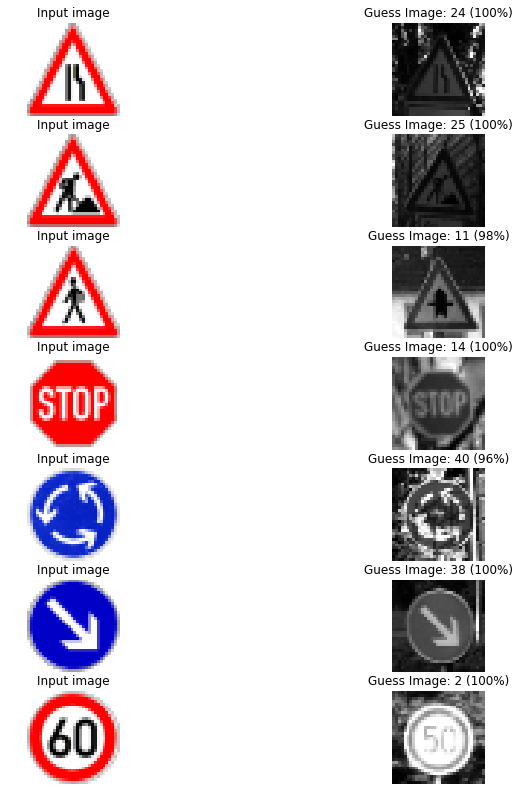

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)
pridected_guess = []
# Get top probabilities and indices for candidate images
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_top_k = sess.run(top_k, feed_dict={x: candidate_images, keep_prob: 1.0})
    print(my_top_k)

    # Plot the images
    figure, axis = plt.subplots(len(candidate_images),2, figsize=(12, 14))
    axis = axis.ravel()

    # Model top predictions
    for i, image in enumerate(candidate_image_normal):
        axis[2*i].axis('off')
        axis[2*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        axis[2*i].set_title('Input image')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axis[2*i+1].axis('off')
        axis[2*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        pridected_guess.append(guess1)
        
        axis[2*i+1].set_title('Guess Image: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))

### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import numpy as np
correct_lables = np.intersect1d(pridected_guess, candidate_labels)
print('Accuracy of predicted images {:.0f}%'.format((len(correct_lables) * 100)/ len(pridected_guess)))

Accuracy of predicted images 71%


[[24 21 19]
 [25 20 27]
 [11 27 18]
 [14  2  5]
 [40 11 12]
 [38 25 18]
 [ 2  3  1]]


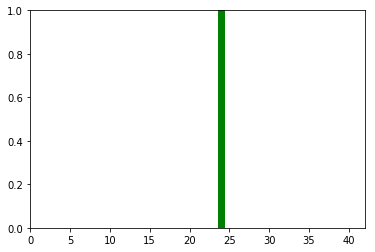

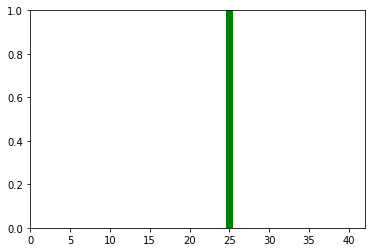

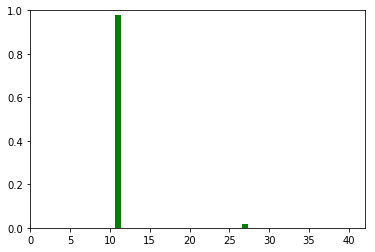

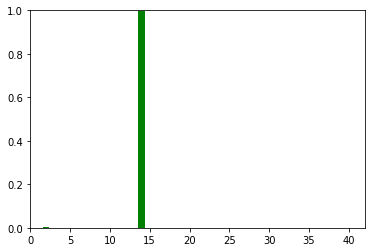

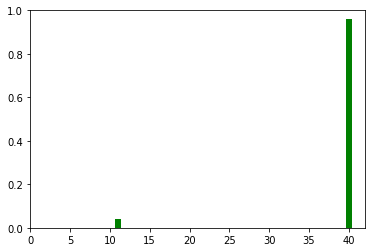

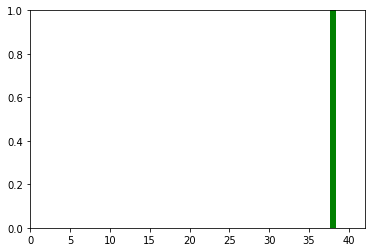

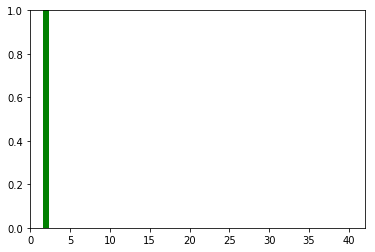

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

my_top_values = my_top_k.values
my_top_indices = my_top_k.indices

print(my_top_indices)

for index, vals_array in enumerate(my_top_values):
    y = vals_array
    x = my_top_indices[index][:]
    fig = plt.figure()    
    plt.bar(x, y, color="green")
    plt.axis([0, 42, 0, 1])

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Candiate images and predictions are plotted above. 
For most of the cases(5 out of 7) on candidate images, model is certain in first guess. 
If guess is incorrect on initial prediction it is not able to make correct prediction in top 3 most of the times. 
Overall on small dataset of images I got 71.4% of accuracy. 


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 